# Optimization Objective 

สำหรับปัญหา Classification แบบ Logistic Regression ถ้า y = 1 เราก็ต้องการให้ $h_{\theta}(x) \approx 1$ ซึ่งหมายความว่า $\theta^{T}x >> 0$ เหมือนกันกับกรณีที่ $y=0$ ตัว $\theta^{T}x << 0$

<img src="img/58.png" style="width:700px;">

กรณีที่ $y = 1$ จะได้ $J_{1}(\theta) = -\log\frac{1}{1+e^{-z}}$ และที่ $y = 0$ จะได้ $J_{0}(\theta) = -\log(1-\frac{1}{1+e^{-z}})$

<img src="img/59.png" style="width:700px;">

จากรูปข้างบนจะเห็น ถ้าเราประมาณกราฟ $-\log\frac{1}{1+e^{-z}}$ กับ $-\log(1-\frac{1}{1+e^{-z}})$ ด้วยกราฟที่คล้ายๆกัน คือ $\text{Cost}_{1}(z)$ กับ $\text{Cost}_{0}(z)$ เมื่อ $y = 1$ และ $0$ ตามลำดับ จะได้ว่า

<img src="img/60.png" style="width:700px;">

จะเห็นว่า Cost Function ของ SVM แม่งคล้ายๆ LR ที่แทน  $-\log\frac{1}{1+e^{-z}}$ กับ $-\log(1-\frac{1}{1+e^{-z}})$ ด้วย $\text{Cost}_{1}(z)$ กับ $\text{Cost}_{0}(z)$ ตามลำดับ เอา $\frac{1}{m}$ ออก แล้วก็ย้าย $\lambda$ ที่อยู่พจน์ข้างหลัง(Regularize) ไปไว้ข้างหน้าแทน (ให้ผลเหมือนกันแหละ เช่น ถ้าเราอยากให้นำหนักพจน์ข้างหลังเยอะๆ ก็เอา $C$ ค่าน้อยๆคูณพจน์ข้างหน้าแทน เป็นต้น)

<img src="img/61.png" style="width:700px;">

# Large Margin Intuition

<img src="img/62.png" style="width:700px;">

สำหรับ SVM เราจะทายว่า $y = 1$ เมื่อ $\theta^{T}x >= 1$ หรือ $y = 0$ เมื่อ $\theta^{T}x < -1$ 

<img src="img/63.png" style="width:700px;">

ซึ่งหมายความว่าค่า เส้น decision boundary จะหนาขึ้นปะ โดยจะรวม $\theta^{T}x$ ที่อยู่ระหว่าง $-1$ ถึง $1$ ด้วย มองเป็น space ว่างๆ ซึ่งเรียกว่า margin ดังรูปข้างล่าง (SVM จะเลือก decision boundary ที่มี margin หนาที่สุด)

<img src="img/64.png" style="width:700px;">

ทีนี้จาก Cost Function ถ้า C มีค่ามากๆ เวลา fit model กับ data มันจะ sensitive กับข้อมูลมาก (ตรงข้ามกับกรณี $\lambda$ มากๆ) อย่างในรูปข้างล่าง ที่ C มากๆ แม้มี X ไม่กี่ตัวอยู่ในกลุ่ม O เวลา fit เส้น decision boundary มันก็พยายามจะเบ้เข้าไปกวาดให้มาอยู่ฝั่งเดียวกันให้หมด

<img src="img/65.png" style="width:700px;">

# Mathematics Behind Large Margin Classification

<img src="img/66.png" style="width:700px;">

ทบทวน สมมติมี vector 2 อันคือ $u$ กับ $v$ จะหาขนาดของ $v$ บน $u$ ก็ต้อง $u\cdot v$ ซึ่ง $u \cdot v = u^Tv$ (อ่าน $u\cdot v$ อ่านว่าทำ inner product กัน) หรือเท่ากับ  $p \cdot ||u||$ เมื่อ $||u||$ คือขนาดของเวกเตอร์ $u$ โดย $p$ จะมีค่าบวกเมื่อมุมระหว่าง $u$ กับ $v$ น้่อยกว่า 90 องศา ถ้า**มากกว่าจะเป็นลบ** 

We're going to use these properties of vector inner product to try to understand the support vector machine optimization objective over there.

เพื่อให้ง่ายต่อการ plot เริ่มจากกรณีง่ายๆก่อน (Simplication) ที่ $C = 0,\theta_0 = 0$ (decision boundary จะตัดจุด origin) และมี feature แค่ 2 ตัว คือ $x_1,x_2$

<img src="img/67.png" style="width:700px;">

ถ้า The optimization objective of the SVM คือ $\text{min}_{\theta}\frac{1}{2}\sum_{j=1}^{n}\theta^2_j$ แล้วเรามี features แค่ 2 ตัวจะได้ $\frac{1}{2}\sum_{j=1}^{n}\theta^2_j = \frac{1}{2}(\theta^2_1+\theta^2_2)$ ดังรูปข้างบน เท่ากับ $\frac{1}{2}(||\theta||)^2$ ซึ่ง $||\theta||$ ก็คือความยาวของเวกเตอร์ $\theta$ (the norm of the vector theta)

- $p^{(i)}$ คือ $x^{(i)}$ ที่ projection ลง $\theta$

<img src="img/68.png" style="width:700px;">

> the SVM can make the norm of the parameters theta much smaller. So, if we can make the norm of theta smaller and therefore make the squared norm of theta smaller, which is why the SVM would choose this hypothesis on the right instead. 

เขียน $\theta^Tx^{(i)}$ ในรูปของ $p^{(i)}\cdot||\theta||$ จะได้

- $p^{(i)}\cdot||\theta|| >= 1 $ ถ้า $y^{(i)}$ = 1
- $p^{(i)}\cdot||\theta|| <= -1$ ถ้า $y^{(i)}$ = -1


ต่อไปพิจารณา training example แล้วดูว่า decision boundary ที่ SVM จะเลือกจะเป็นยังไง จากรูปข้างบน
- ฝั่งซ้ายเป็นแบบที่ SVM จะไม่เลือกเป็น decision boundary เพราะไม่ใช่ตัวเลือกที่ดี เพราะว่า margin มันเล็ก เทียบกับฝั่งขวา margin ใหญ่กว่า เป็น decision boundary ที่ดีกว่าชัดเจน (margin = min($p$))
- Simplication ที่ $\theta_0 = 0$ (decision boundary จะตัดจุด origin) ถ้าไม่เท่ากับ 0 มันจะไม่ตัดจุด (0,0)
- จาก optimization objective ยิ่งค่า $p^{(i)}\cdot||\theta|| >= 1 $ มากๆ (เช่น $p^{(i)}\cdot||\theta|| = 90$) หรือ $p^{(i)}\cdot||\theta|| <= -1$ มากๆยิ่งดี (เช่น $p^{(i)}\cdot||\theta|| = -10$) มันคือการแบ่งระหว่าง 2 กลุ่มได้ชัดขึ้น 
- ซึ่งการจะเป็นอย่างนั้นได้เนี่ย หาก $p$ มันเล็กมาก $\theta$ ต้องใหญ่ขึ้น เพื่อให้ผลคูณมันออกมาเยอะ กลับกัน หาก $p$ ใหญ่แล้ว $\theta$ ก็เล็กได้ ผลคูณก็จะออกมาเยอะเหมือนกัน
- **decision boundary ที่ดี $||\theta||$ จะน้อย** (margin ต้องเยอะๆ) ซึ่งตรงกับปัญหา optimization ของ SVM

> There's this large margin, there's this large gap that separates positive and negative examples is really the magnitude of this gap. The magnitude of this margin is exactly the values of P1, P2, P3 and so on. And so by making the margin large, by these tyros P1, P2, P3 and so on that's **the SVM can end up with a smaller value for the norm of theta which is what it is trying to do in the objective**. And this is why this machine ends up with enlarge margin classifiers because it trying to maximize the norm of these P1 which is the distance from the training examples to the decision boundary. 

แม้ตัวอย่างเราจะคิดที่ $C = 0$ อย่างไรก็ตาม ในกรณีที่ C มีค่ามากๆ ก็มีวิธีคิดแบบนี้เหมือนกัน

you know, when theta is not equal to 0 this **support vector machine is still finding is really trying to find the large margin separator that between the positive and negative examples**. So that explains how this support vector machine is a large margin classifier. 

# Kernels I

หนึ่งในวิธีการที่จะทำให้ decision boundary เป็นแบบ non-linear แล้วแก้ปัญหาที่ซับซ้อนขึ้นได้คือ เพิ่ม feature ที่เป็น polynomial เข้าไป

โดย kernels คือการสร้าง features ใหม่ เพื่อใช้กับ SVM

จากรูปข้างล่างเขียนพจน์ $x$ ให้อยู่ในรูปของ $f$ (feature) แทน

<img src="img/69.png" style="width:700px;">

สำหรับ kernel มันเริ่มจากการกำหนด landmark ($l^{(1)},l^{(2)},l^{(3)}$) ขึ้นมา ซึ่งก็คือจุด 3 ค่าบนระนาบ $x1-x2$ นั่นเอง

<img src="img/70.png" style="width:700px;">

จากรูปข้างบนจะเห็นว่าถ้าเรามีจุด landmark ($l^{(1)},l^{(2)},l^{(3)}$) 3 จุด ก็จะมี $(f_1,f_2,f_3)$ 3 feature เหมือนกัน ($f_i$ ก็คือ feature ใหม่ของเราที่ map มาจาก $x$ และ $l^{(i)}$) 

มาลองแทนค่า $x$ เพื่อหา $f$ กัน ตามรูปข้างล่างเลย

<img src="img/71.png" style="width:700px;">

สังเกตุว่าถ้า $x$ มีค่าใกล้ $l^{(1)}$ มากๆ $||x-l^{(1)}||$ จะมีค่าใกล้ 0 ทำให้ $f_1 \approx 1$

ส่วนถ้า $x$ อยู่ห่างจาก $l^{(1)}$ จะทำให้ $||x-l^{(1)}||$ มีค่ามาก แล้ว $f_1 \approx 0$

ดูแบบ visualize สักหน่อย เมื่อมี landmark อยู่ที่ $(x_1,x_2) = (3,5)$

<img src="img/72.png" style="width:700px;">

จะเห็นว่าที่ (3,5) $f_1$ จะมีค่าสูงสุด และจุดที่ห่างออกไปจะมีค่าต่ำลงเรื่อยๆ ซึ่งค่า $\sigma^2$ มีผลต่ออัตตราการเปลี่ยนแปลงของ $f_1$

มาลองพิจารณาแบบรวมๆ กรณีมี landmark 3 จุด **(โดยสมมติ ว่าเลือก landmark และ $\theta$ แล้ว)**

<img src="img/73.png" style="width:700px;">

จากรูปข้างบน เมื่อ $\theta_0=-0.5$,$\theta_1=1$,$\theta_2=1$,$\theta_0=0$ แล้ว

### เราจะทายว่าเป็น 1 เมื่อ
$$\theta_0+\theta_1f_1+\theta_2f_2+\theta_3f_3 >= 0$$

ซึ่งเมื่อลองแทนๆค่าดูแล้วจะเห็นว่าที่บริเวณใกล้ๆ $l^{(1)},l^{(2)}$ เท่านั้นที่จะเป็น 1 นอกนั้น 0

# Kernels II

ลองมาใช้จริงกับชุดข้อมูล $x_1,x_2,\cdots,x_m$ เลือก landmark เป็นจุดเดียวกับจุดข้อมูลทุกจุดที่เรามี

In practice this is **how the landmarks are chosen** which is that given the machine learning problem. We have some data set of some some positive and negative examples. 

> We're just going to **put landmarks as exactly the same locations as the training examples**. 

So if I have one training example if that is x1, well then I'm going to choose this is my first landmark to be at xactly the same location as my first training example. 

And if I have a different training example x2. Well we're going to set the second landmark to be the location of my second training example. 

<img src="img/74.png" style="width:700px;">

On the figure on the right, I used red and blue dots just as illustration, the color of this figure, the color of the dots on the figure on the right is not significant. 

But what I'm going to end up with using this method is I'm going to end up with m landmarks of l1, l2 
down to l(m) if I have m training examples with one landmark per location of my per location of each of my training examples. And this is nice because it is saying that my features are basically going to measure how close an example is to one of the things I saw in my training set. 

So, just to write this outline a little more concretely, given m training examples, I'm going to choose the the location of my landmarks to be exactly near the locations of my m training examples. 

> จากในรูป จะเห็นว่า $f_1,f_2,f_3,\cdots,f_m$ มีค่าเท่ากับจำนวน landmarks 

### สรุปคือ
- เลือก landmark เป็นจุดเดียวกับจุดข้อมูล ดังนั้นจะมี $l^{(1)},l^{(2)},\cdots,l^{(m)}$
- สำหรับจุดข้อมูล $x^{(i)}$ หนึ่งจุดจะมี $f^{(i)} \in \mathbb{R}^{mx1}$ แต่ถ้าเพิ่ม $f^{(i)}_0$ ด้วยก็จะได้ $f^{(i)} \in \mathbb{R}^{(m+1)x1}$
- หมายความว่า สำหรับจุดข้อมูล $(x^{(i)},y^{(i)})$ ต้อง map ไปเป็น vector $f^{(i)}$ ถ้ามีจุด m จุดก็จะมีเวกเตอร์ $f \in \mathbb{R}^{mx1}$ m ตัว
- ณ จุดที่ $x^{(i)} = l^{(i)}$ similarity($x^{(i)},l^{(i)}$) จะเท่ากับ 1
- กรณีมีหลายฟีเจอร์ $x_1,x_2,\cdots,x_n$ ??

<img src="img/75.png" style="width:700px;">

- ถ้ารู้ $\theta$ แล้ว จะหาค่า prediction ก็ตามรูปข้างล่างเลย ถ้า $\theta^Tf >= 0$ ก็ให้ทายว่าเป็น 1 ไป
- เมื่อจำนวน landmarks = จำนวนจุด training set (m) จะได้ว่าจำนวน parameter ของ model คือ m+1

### วิธีการหาค่า $\theta$

- จากเดิมที่ minimized Cost Function ของ $x^{(i)}$ ให้เปลี่ยน $x^{(i)}$ เป็น $f^{(i)}$ แทน
- Solve สมการในรูปข้างล่างก็จะได้ $\theta$
- จำนวน $\theta$ คือ n = m

<img src="img/76.png" style="width:700px;">

- ด้วยที่ n (จำนวน features) เท่ากับ m (จำนวนข้อมูล) ถ้าหากข้อมูลมีจำนวนมากๆเป็นหมื่นๆ จะทำให้ $\theta^T\theta$ ใหญ่มาก อาจคูณลำบาก อาจต้องแปลงเป็น $\theta^TM\theta$

### Variance & Bias when using a SVM
When using an SVM, one of the things you need to choose is the parameter C which was in the optimization objective, and you recall that C played a role similar to $\frac{1}{\lambda}$, where $\lambda$ was the regularization parameter we had for logistic regression. 

<img src="img/77.png" style="width:700px;">

- ถ้าเราให้ C ใหญ่ๆ model จะ overfiting (high variance) เพราะเราให้ความสำคัญกับพจน์ error มาก แต่ให้ความสำคัญกับพจน์ regularization น้อย
- กลับกัน ถ้าให้ C น้อยๆ พจน์ regularization จะใหญ่ขึ้น model จะ underfittion (High bias)
- **C คือหนึ่งใน parameter ที่เราต้องเลือก**
- $\sigma^2$ ก็เป็นพารามิเตอร์อีกตัวที่เราต้องเลือกเหมือนกัน ยิ่ง $\sigma^2$ มีค่ามาก model จะลู่ไปทาง underfitting แต่ถ้าเล็กจะทำให้ overfitting

$$ \text{Gaussian kernel} = \text{exp}(\frac{||x-l^{(i)}||^2}{2\sigma^2}) $$

# Using An SVM

SVM แม่งเป็นอัลกอริทึมยาก ไม่แนะนำให้เขียนเอง มักใช้ software ช่วย

ถึงจะใช้ software อื่นทำแต่ก็มีบางอย่างที่ต้องเลือก ดังนี้
- ค่า C
- เลือก kernel (similarity function) เช่น linear kernel (สำหรับจะแบ่งแบบ linear), Gaussian kernel (ถ้าเลือก GS ต้องเลือก $\sigma^2$ ด้วย),...

<img src="img/78.png" style="width:700px;">

ตัวอย่างการใช้งานฟังก์ชั่น Gaussian kernel (อันนี้ของ MATLAB)

### ต้องทำ feature scaling ก่อนทำ Gaussian kernel ด้วยนะ

<img src="img/79.png" style="width:700px;">

เลือกใช้ kernel มีให้เลือกหลายแบบ ส่วนมากมี input แค่ x กับ l

<img src="img/80.png" style="width:700px;">

การทำ multi-class classification

<img src="img/81.png" style="width:700px;">

### กรณีไหนควรใช้ Logistic Regression , NN หรือ SVMs

<img src="img/82.png" style="width:700px;">

# ==================== CODE =====================

In [258]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat

# ข้อมูล การเปลี่ยนแปลงของระดับน้ำ x กับจำนวนของการไหลของน้ำออกจาก dam y
data1 = loadmat('programing/machine-learning-ex6/ex6/ex6data1.mat')

X1 = data1['X']
y1 = data1['y'].T[0]

datafr1 = pd.DataFrame({'x1': pd.DataFrame(X1)[0], 'x2': pd.DataFrame(X1)[1],'y':pd.DataFrame(y1)[0]})

# 1 Support Vector Machines

## 1.1 Example Dataset 1

จากข้อมูล 2D Example $(x_1,x_2)$ และ $y$ ที่ y = 1 เป็น + , y = 0 เป็น -

In [199]:
def plotData(X,y):
    datafr = pd.DataFrame({'x1': pd.DataFrame(X)[0], 'x2': pd.DataFrame(X)[1],'y':pd.DataFrame(y)[0]})
    grp = datafr.groupby('y')
    positive_data = grp.get_group(1)
    negative_data = grp.get_group(0)

    plt.figure(figsize=(7,6))

    positive = plt.scatter(positive_data.values[:,0], positive_data.values[:,1], marker='+', color='black')
    negative = plt.scatter(negative_data.values[:,0], negative_data.values[:,1], marker='o', color='y')

    plt.legend((positive, negative),('Positive', 'Negative'),scatterpoints=1,loc='upper right',ncol=1,fontsize=8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

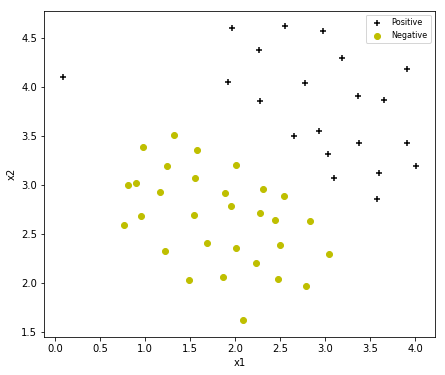

In [200]:
plotData(X1,y1)

# 1.2 Training Linear SVM

ลองใช้ Scikit-learn Plot ดู

แปลง $X$ = [$x_1 \quad x_2$] เป็น $X$ = [$1 \quad x_1 \quad x_2$]

In [208]:
ones1 = np.ones((X1.shape[0],1))
X1_one = np.hstack((ones1,X1))

Train model

In [266]:
from sklearn.svm import LinearSVC

clf1 = LinearSVC(random_state=0,C=1,loss="hinge") # random state บอกว่าเวลาแบ่งชุด train กับ test จะสุ่มได้ชุดเดิม
clf1.fit(X1, y1)

theta1 = clf1.coef_[0] # theta1 theta2
intercept1 = clf1.intercept_[0] # theta0
parameter1 = [intercept1 ,theta1[0],theta1[1]] 
print(parameter1)
print(clf1.predict([[1, 1]]))

[-4.1156255099875487, 0.59133083978033707, 0.81664279961345809]
[0]


### Decision Boundary
$X\theta > 1 $ เมื่อ y = 1

$X\theta < -1 $ เมื่อ y = 0

$X\theta = 0 $ เส้นกลาง

In [267]:
def plotDataWithLinearLine(theta, X,y):
    datafr = pd.DataFrame({'x1': pd.DataFrame(X)[0], 'x2': pd.DataFrame(X)[1],'y':pd.DataFrame(y)[0]})
    
    # Plot Data     
    grp = datafr.groupby('y')
    positive_data = grp.get_group(1)
    negative_data = grp.get_group(0)

    plt.figure(figsize=(7,6))

    positive = plt.scatter(positive_data.values[:,0], positive_data.values[:,1], marker='+', color='black')
    negative = plt.scatter(negative_data.values[:,0], negative_data.values[:,1], marker='o', color='y')

    # Plot Decision Boundary 
    theta0 = theta[0]
    theta1 = theta[1]
    theta2 = theta[2]
    x1min,x1max = min(datafr['x1']),max(datafr['x1'])
    x1_axis = np.matrix(np.arange(x1min, x1max, 0.05)).T
    # center line
    x2_center = (-theta0-theta1*x1_axis)/theta2
    # positive line
    x2_pos = (1-theta0-theta1*x1_axis)/theta2
    # negative line
    x2_neg = (-1-theta0-theta1*x1_axis)/theta2
    
    plt.plot(x1_axis,x2_center)  
    plt.plot(x1_axis,x2_pos,'b--')  
    plt.plot(x1_axis,x2_neg,'b--')  
    plt.legend((positive, negative),('Positive', 'Negative'),scatterpoints=1,loc='upper right',ncol=1,fontsize=8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

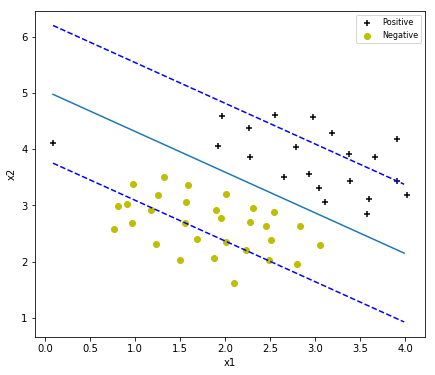

In [269]:
plotDataWithLinearLine(parameter1,X1,y1)

รูปข้างบนคือเมื่อ **C = 1**

### เมื่อ C = 100

In [271]:
clf2 = LinearSVC(random_state=0,C=100,loss="hinge") # random state บอกว่าเวลาแบ่งชุด train กับ test จะสุ่มได้ชุดเดิม
clf2.fit(X1, y1)

theta2 = clf2.coef_[0] # theta1 theta2
intercept2 = clf2.intercept_[0] # theta0
parameter2 = [intercept2 ,theta2[0],theta2[1]] 
print(parameter2)
print(clf2.predict([[1, 1]]))

[-12.555963340716055, 1.0479652216068376, 3.0773228104259283]
[0]


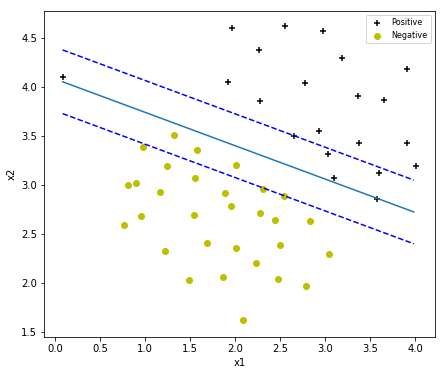

In [273]:
plotDataWithLinearLine(parameter2,X1,y1)

จะเห็นว่าไอ้จุดห่างๆที่ตอนแรกอยู่ฝั่ง negative จะโดนรวมไปอยู่ฝั่ง positive แล้ว เพราะการเพิ่ม C มันทำให้ model fit มากขึ้น

# 1.3 SVM with Gaussian Kernels

สำหรับข้อมูลที่ decision boundary เป็น non-linear function โดยทั่วไปแล้วเราจะใช้ SVM กับ Gaussian Kernels ในการแยก ดังนั้นต้องสร้าง function Gaussian Kernels ก่อน

> You can think of the Gaussian kernel as a **similarity function that measures the “distance” between a pair of examples, $(x^{(i)},x^{(j)})$**. The Gaussian kernel is also parameterized by a bandwidth parameter, **$\sigma$, which determines how fast the similarity metric decreases (to 0)** as the examples are further apart.

The Gaussian kernel is defined as: 

$$K_{gaussian}(x^{(i)},x^{(j)}) = \text{exp}\Big(-\frac{||x^{(i)}-x^{(j)}||^2}{2\sigma^2} \Big) = \text{exp}\Big(-\frac{\sum_{k=1}^{n}(x_k^{(i)}-x_k^{(j)})^2}{2\sigma^2} \Big)$$

โดยยิ่งค่าต่างกันน้อย $K_{gaussian}(x^{(i)},x^{(j)})$ จะมีค่าเข้าใกล้ 1 แต่หากค่าต่างกันมาก $K_{gaussian}(x^{(i)},x^{(j)})$ จะลู่เข้า 0

In [296]:
# สมมติ
#       | 1 x1 x2 | 
#  X =  | 1 x1 x2 |  ค่า xi ที่ใส่เข้าไปในฟังก์ชั่นคือ x แต่ละแถว
#       | 1 x1 x2 |
 
def gaussianKernel(x1,x2,sigma):
    x1 = np.array(x1) # 1xn
    x2 = np.array(x2) # 1xn
    
    similarity = np.exp(-sum((x1-x2)**2)/(2*sigma*sigma))
    return similarity

For this

x1 = [1; 2; 1]

x2 = [0; 4; -1]

sigma = 2

this value should be about 0.324652

In [299]:
x1_test = np.array([1,2,1])
x2_test = np.array([0,4,-1])
gaussianKernel(x1_test,x2_test,2)

0.32465246735834974

ถูกต้องตามเฉลย